In [73]:
import astsadata
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")

# Chapter 1: Characteristics of Time Series 

In [25]:
jj = astsadata.jj
jj['date'] = jj.index.to_timestamp()
jj

,value,date
index,,
1960Q1,0.71,1960-01-01
1960Q2,0.63,1960-04-01
1960Q3,0.85,1960-07-01
1960Q4,0.44,1960-10-01
1961Q1,0.61,1961-01-01
...,...,...
1979Q4,9.99,1979-10-01
1980Q1,16.20,1980-01-01
1980Q2,14.67,1980-04-01


Text(0.5, 1.0, 'Johnson & Johnson quarterly earnings per share, 84 quarters, 1960-I to 1980-IV.')

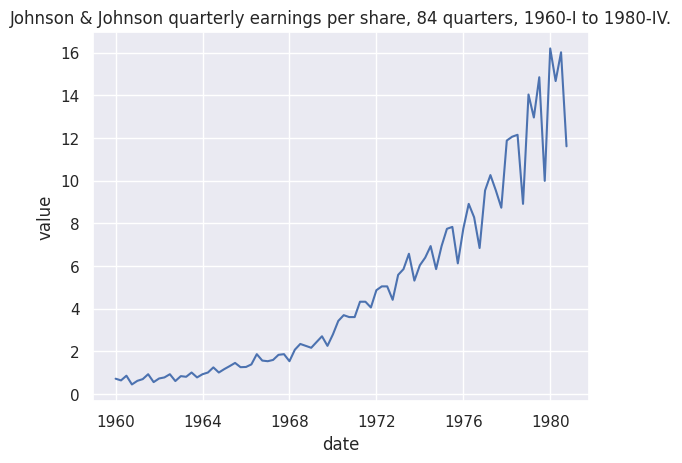

In [51]:
sns.lineplot(x='date',y='value',data=astsadata.jj)
plt.title("Johnson & Johnson quarterly earnings per share, 84 quarters, 1960-I to 1980-IV.")


## Yearly average global temp

In [33]:
globaltemp = astsadata.globtemp
globaltemp['date'] = globaltemp.index.to_timestamp()
globaltemp

,value,date
index,,
1880,-0.20,1880-01-01
1881,-0.11,1881-01-01
1882,-0.10,1882-01-01
1883,-0.20,1883-01-01
1884,-0.28,1884-01-01
...,...,...
2011,0.60,2011-01-01
2012,0.63,2012-01-01
2013,0.66,2013-01-01


Text(0.5, 1.0, 'Yearly average global temperature deviations (1880-2009) in degrees centigrade.')

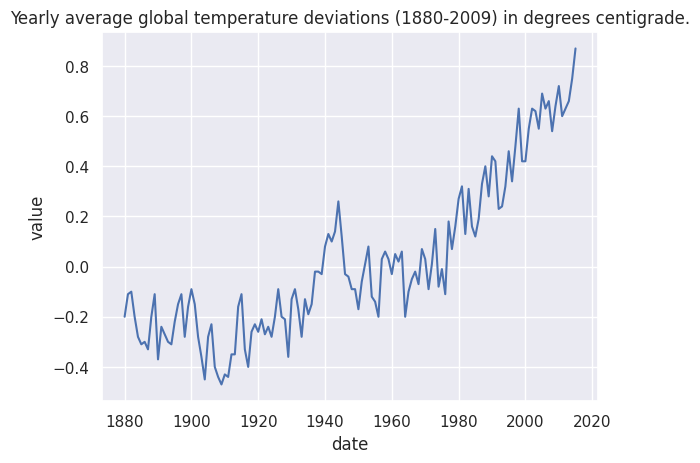

In [52]:
sns.lineplot(x='date',y='value',data=globaltemp)
plt.title("Yearly average global temperature deviations (1880-2009) in degrees centigrade.")

## Speech

In [55]:
speech = astsadata.speech
speech['sample'] = np.arange(len(speech))
speech

,value,index,c,sample
1,1814,1,0,0
2,1556,2,1,1
3,1442,3,2,2
4,1416,4,3,3
5,1352,5,4,4
...,...,...,...,...
1016,2119,1016,1015,1015
1017,2044,1017,1016,1016
1018,1945,1018,1017,1017
1019,1886,1019,1018,1018


Text(0.5, 1.0, 'Speech recording of the syllable aaa...hhh sampled at 10,000 points per second with n = 1020 points.')

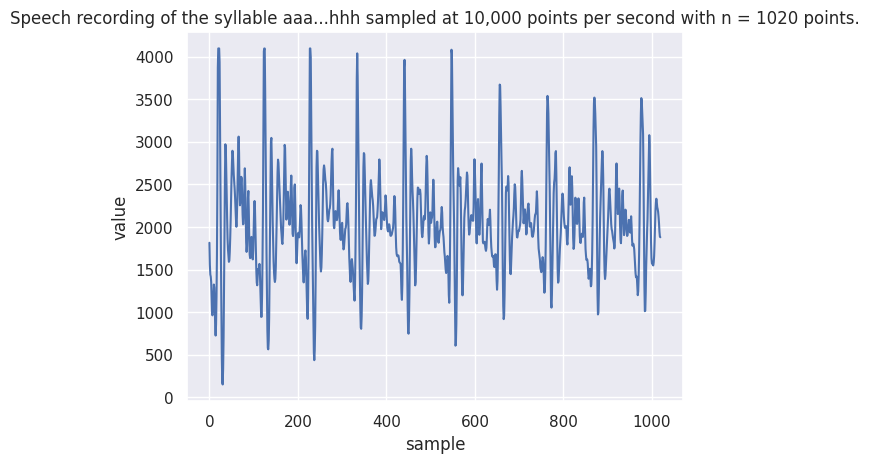

In [56]:
sns.lineplot(x='sample',y='value',data=speech)
plt.title("Speech recording of the syllable aaa...hhh sampled at 10,000 points per second with n = 1020 points.")

In [57]:

nyse = astsadata.nyse
nyse['sample'] = np.arange(len(nyse))
nyse


,value,c,sample
1,0.003349,0,0
2,-0.014175,1,1
3,-0.016727,2,2
4,0.002294,3,3
5,-0.016921,4,4
...,...,...,...
1996,0.007189,1995,1995
1997,0.013256,1996,1996
1998,0.005167,1997,1997
1999,0.019627,1998,1998


Text(0.5, 1.0, 'Returns of the NYSE')

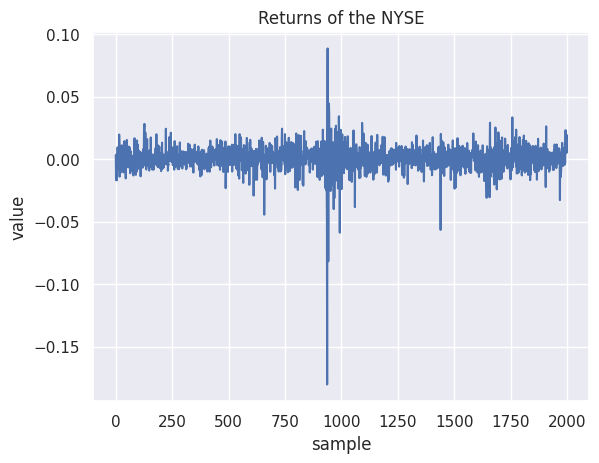

In [59]:

sns.lineplot(x='sample',y='value',data=nyse)
plt.title("Returns of the NYSE")

## Time Series Statistical Models  

In [76]:
N = 500
w = np.random.normal(0,1,N)

(2, 500)


(1000,)

Text(0.5, 1.0, 'White noise')

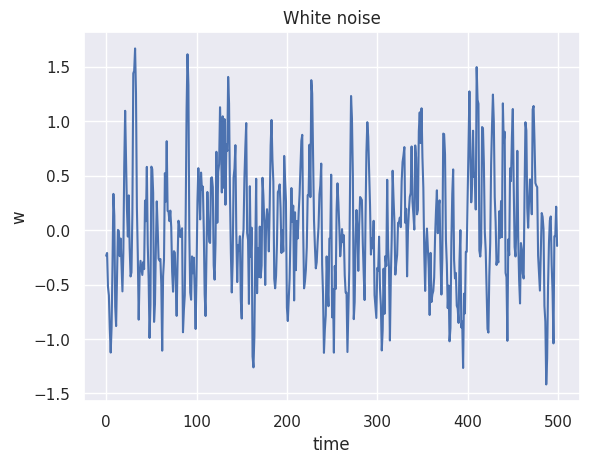

In [83]:
df = pd.DataFrame(data=np.vstack([w, np.arange(N)]).T, columns=['w', 'time'])
sns.lineplot(x='time',y='w',data=df)
plt.title("White noise")

### Moving Averages 

Use a tridiagonal matrix to apply a smoothing filter

In [80]:
V = np.diag(np.ones(N)) + np.diag(np.ones(N-1), -1) + np.diag(np.ones(N-1), 1)
V

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

Text(0.5, 1.0, 'Moving Averages')

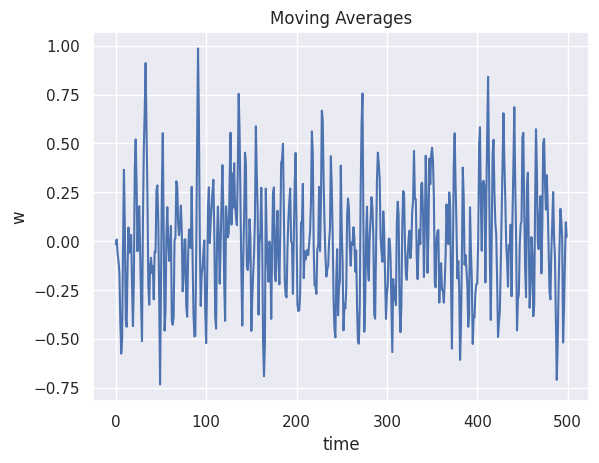

In [91]:
N = 500
w_smoothed = 1/3 * (w @ V)
df = pd.DataFrame(data=np.vstack([w_smoothed, np.arange(N)]).T, columns=['w', 'time'])
sns.lineplot(x='time',y='w',data=df)
plt.title("Moving Averages")

### Autoregressions

Text(0.5, 1.0, 'Autoregressions')

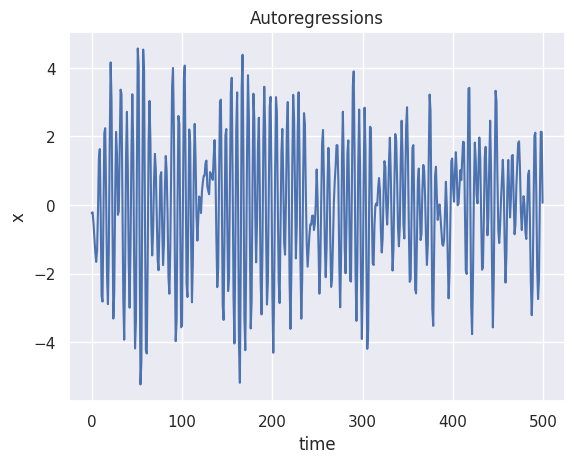

In [92]:
x = [w[0], w[1]]
for t in range(2, len(w)):
    x_t = x[t-1] - 0.9*x[t-2] + w[t]
    x.append(x_t)
df = pd.DataFrame(data=np.vstack([x, np.arange(N)]).T, columns=['x', 'time'])
sns.lineplot(x='time',y='x',data=df)
plt.title("Autoregressions")

### Random Walk with Drift

Text(0.5, 1.0, 'Random Walk with and without Drift')

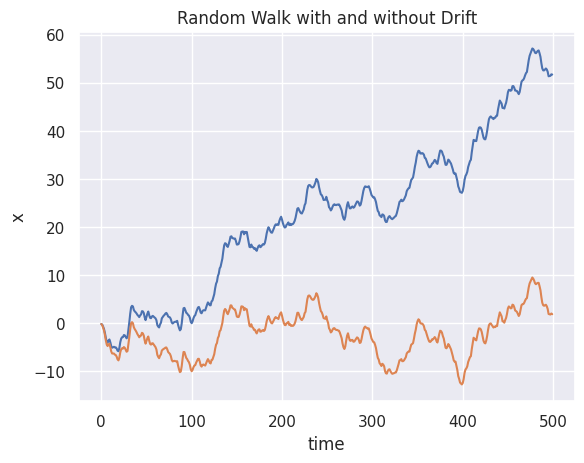

In [99]:
x = [w[0]]
x_without_drift = [w[0]]
delta = 0.1
for t in range(1, len(w)):
    x_t = delta + x[t-1] + w[t]
    x.append(x_t)
    
    # without drift
    x_without_drift_t = x_without_drift[t-1] + w[t]
    x_without_drift.append(x_without_drift_t)
df = pd.DataFrame(data=np.vstack([x, np.arange(N)]).T, columns=['x', 'time'])
sns.lineplot(x='time',y='x',data=df)
df = pd.DataFrame(data=np.vstack([x_without_drift, np.arange(N)]).T, columns=['x', 'time'])
sns.lineplot(x='time',y='x',data=df)
plt.title("Random Walk with and without Drift")